<a href="https://colab.research.google.com/github/MOULIK-RAZDAN/WHATSAPP-CHATS-STATS/blob/main/Whatsapp_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WHATSAPP EXPLORARTRY DATA ANALYSIS**#


In [76]:
data_filename = '/content/drive/MyDrive/projects/whatsapp message (EDA)/WhatsApp Chat with Team Devil.txt'
#contains path to the txt file

#IMPORTING LIBRARIES

In [77]:
!pip install emoji

In [78]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
import os
import emoji
import re
import datetime as time
from collections import  Counter
from wordcloud import WordCloud,STOPWORDS

In [79]:
whatsapp_df = pd.read_fwf(data_filename, header = None)
whatsapp_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,"10/01/2021, 7:26 pm - Messages and calls are e...",can,read,or,listen,to,them.,Tap,to,learn,more.
1,"10/01/2021, 7:26 pm - Omesh Kumar created grou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"10/01/2021, 7:26 pm - Omesh Kumar added you",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"10/01/2021, 7:26 pm - Omesh Kumar: Guys from n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"10/01/2021, 7:26 pm - Omesh Kumar: I can trust...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"10/01/2021, 7:27 pm - Omesh Kumar: Please unde...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"10/01/2021, 7:28 pm - Omesh Kumar: And avoid p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,For some time .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Samp ko pkdna ha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"10/01/2021, 7:28 pm - Moulik Razdan: Kyu bhai ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Converting chat log to a dataframe


In [80]:
def txtTodf(txt_file):
    '''Convert WhatsApp chat log text file to a Pandas dataframe.'''
    
    # some regex to account for messages taking up multiple lines
    pat = re.compile(r'^(\d\d\/\d\d\/\d\d\d\d.*?)(?=^^\d\d\/\d\d\/\d\d\d\d|\Z)', re.S | re.M)
    with open(txt_file) as file:
        data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]

    user     = []; 
    message  = []; 
    datetime = []
    
    for row in data:

        # timestamp is before the first dash
        datetime.append(row.split(' - ')[0])

        # sender is between am/pm, dash and colon
        try:
            s = re.search('m - (.*?):', row).group(1)
            user.append(s)
        except:
            user.append('')

        # message content is after the first colon
        try:
            message.append(row.split(': ', 1)[1])
        except:
            message.append('')

    df = pd.DataFrame(zip(datetime, user, message), columns=['datetime', 'user', 'message'])
    df['datetime'] = pd.to_datetime(df.datetime, format='%d/%m/%Y, %I:%M %p')

    # remove events not associated with a sender
    df = df[df.user != ''].reset_index(drop=True)
    
    return df

whatsapp_df = txtTodf('/content/drive/MyDrive/projects/whatsapp message (EDA)/WhatsApp Chat with Team Devil.txt')

In [81]:
img = whatsapp_df[whatsapp_df['message'] == "<Media omitted>" ]
img.shape

(2005, 3)

In [82]:
whatsapp_df.drop(img.index, inplace=True)
whatsapp_df

,datetime,user,message
0,2021-01-10 19:26:00,Omesh Kumar,Guys from now on message only here
1,2021-01-10 19:26:00,Omesh Kumar,I can trust only those who re in this group
2,2021-01-10 19:27:00,Omesh Kumar,Please understand the situation
3,2021-01-10 19:28:00,Omesh Kumar,And avoid previous group as much as possible F...
4,2021-01-10 19:28:00,Moulik Razdan,Kyu bhai kya hua
...,...,...,...
11040,2021-06-01 20:15:00,+91 85294 80565,😂😂😂😂 kn. Bs aise hi.
11044,2021-06-01 22:13:00,Moulik Razdan,Aa gaya abh
11051,2021-06-02 12:39:00,+91 77340 02221,lagta h china nai nai bimariya hi banata h
11052,2021-06-02 12:39:00,+91 77340 02221,😢


#Question 1 : User with maximum number of messages in the group?
---

In [85]:
whatsapp_df1 = whatsapp_df.copy();
whatsapp_df1["Number_of_Messages"] = [1]* whatsapp_df1.shape[0]
#whatsapp_df1.drop(columns=["datetime", "message"], inplace= True)
whatsapp_df1 = whatsapp_df1.groupby('user')['Number_of_Messages'].count().sort_values(ascending = False).reset_index() 


#whatsapp_df1 = whatsapp_df1.groupby('user').count().sort_values(by =['Number_of_Messages'], ascending = False )


##DATA VISUALIZATION

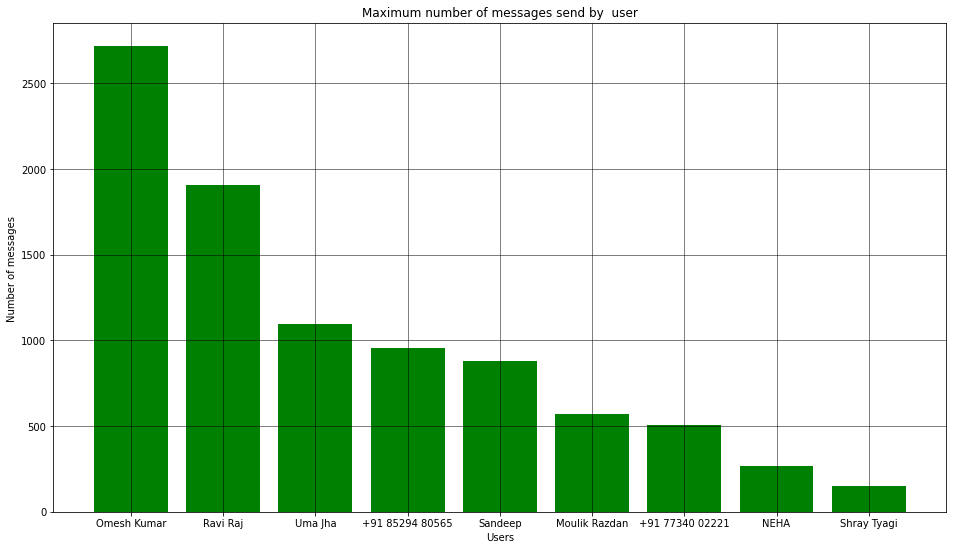

In [86]:
#sns.set_style("darkgrid")

plt.figure(figsize = (16,9))

plt.bar(whatsapp_df1.user, whatsapp_df1.Number_of_Messages, color= 'g')
plt.xlabel("Users")
plt.ylabel("Number of messages ")
plt.title("Maximum number of messages send by  user")
plt.grid(linewidth = 0.5,color = "black");

In [87]:
fig = px.pie(whatsapp_df1, values="Number_of_Messages", names="user", title = "Maximum number of messages send by  user")
fig

#Question 2 : Most active hour in the group?
---

In [88]:
whatsapp_df2 = whatsapp_df.copy();

In [89]:

whatsapp_df2["Number_of_Messages"] = [1] * whatsapp_df2.shape[0]
#whatsapp_df2 = whatsapp_df2.drop(columns=['datetime', 'user', 'message'], inplace= True)

whatsapp_df2["hours"] = whatsapp_df2["datetime"].apply(lambda x: x.hour)
#whatsapp_df2 = whatsapp_df2.drop(['datetime', 'user', 'message'],axis=1, inplace= True)
time_df = whatsapp_df2.groupby('hours').count().sort_values(by = "hours").reset_index()

time_df.drop(['user','datetime','message'], axis=1,inplace= True)
time_df

,hours,Number_of_Messages
0,0,474
1,1,146
2,2,1
3,3,1
4,5,3
5,6,13
6,7,9
7,8,45
8,9,349
9,10,379


##DATA VISUALIZATION


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.



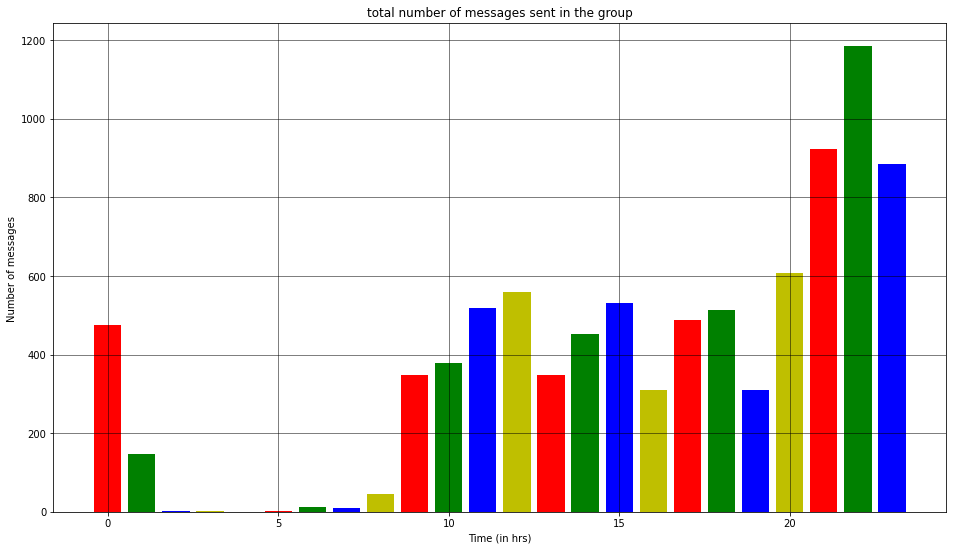

In [90]:
plt.figure(figsize = (16,9))

plt.bar(time_df.hours, time_df.Number_of_Messages, color= 'rgby')
plt.xlabel("Time (in hrs)")
plt.ylabel("Number of messages ")
plt.title("total number of messages sent in the group")
plt.grid(linewidth = 0.5,color = "black");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



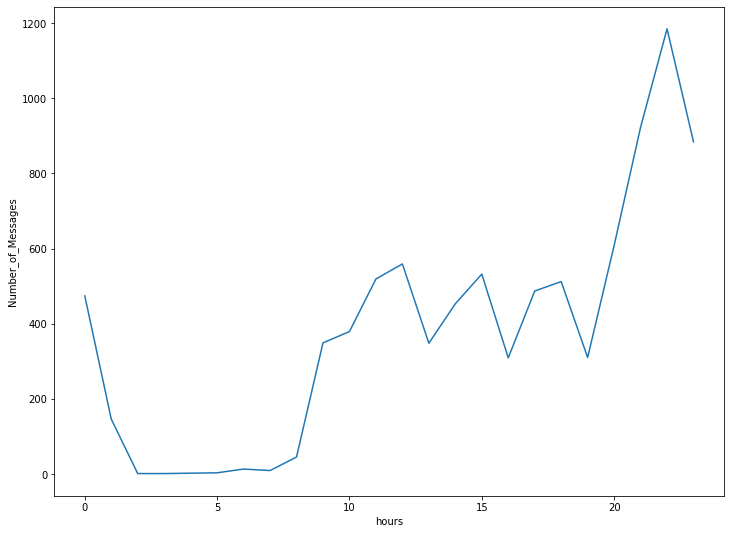

In [91]:
plt.figure(figsize = (12,9))

sns.lineplot(time_df.hours, time_df.Number_of_Messages,data = time_df );

#Question 3 : Most busiest month of the group?
---

In [92]:
whatsapp_df3 = whatsapp_df.copy();

In [93]:
whatsapp_df3["Number_of_Messages"] = [1] * whatsapp_df3.shape[0]
whatsapp_df3["Months"] = whatsapp_df3["datetime"].apply(lambda x: x.month)

time_df = whatsapp_df3.groupby('Months').count().sort_values(by = "Months").reset_index()

time_df.drop(['user','datetime','message'], axis=1,inplace= True)
time_df

,Months,Number_of_Messages
0,1,3696
1,2,2529
2,3,1204
3,4,891
4,5,582
5,6,147


##DATA VISUALIZATION


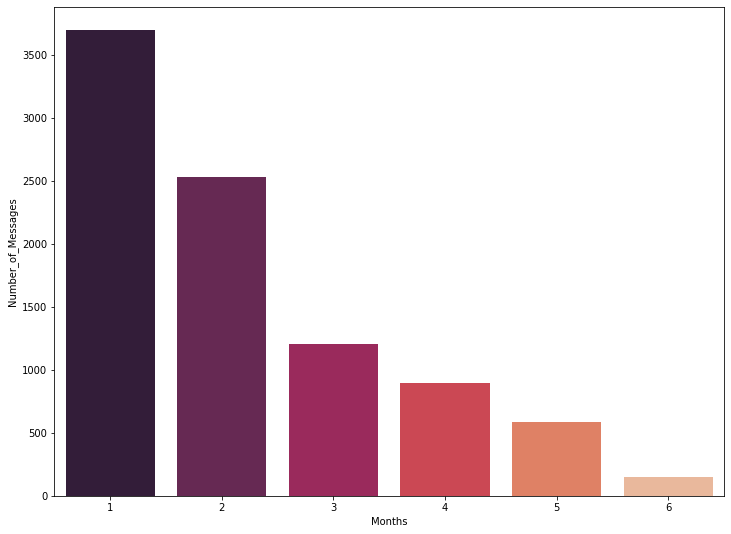

In [94]:
plt.figure(figsize=(12,9))
sns.barplot(x= "Months", y = "Number_of_Messages", data = time_df, palette= sns.color_palette('rocket', 6));

#Question 4 : Average message length by each user?

---




In [95]:
whatsapp_df4 = whatsapp_df.copy();

In [96]:
whatsapp_df4['message_length'] = whatsapp_df4['message'].apply(lambda x: len(x))
msg_length_df = whatsapp_df4.groupby('user').mean().sort_values(by = 'message_length', ascending = False).reset_index()

In [97]:
msg_length_df

,user,message_length
0,Ravi Raj,27.395068
1,Moulik Razdan,26.547368
2,Sandeep,26.521591
3,+91 77340 02221,26.239130
4,+91 85294 80565,25.038784
5,Shray Tyagi,22.888158
6,Omesh Kumar,20.654525
7,NEHA,16.182836
8,Uma Jha,15.454795


#DATA VISUALIZATION

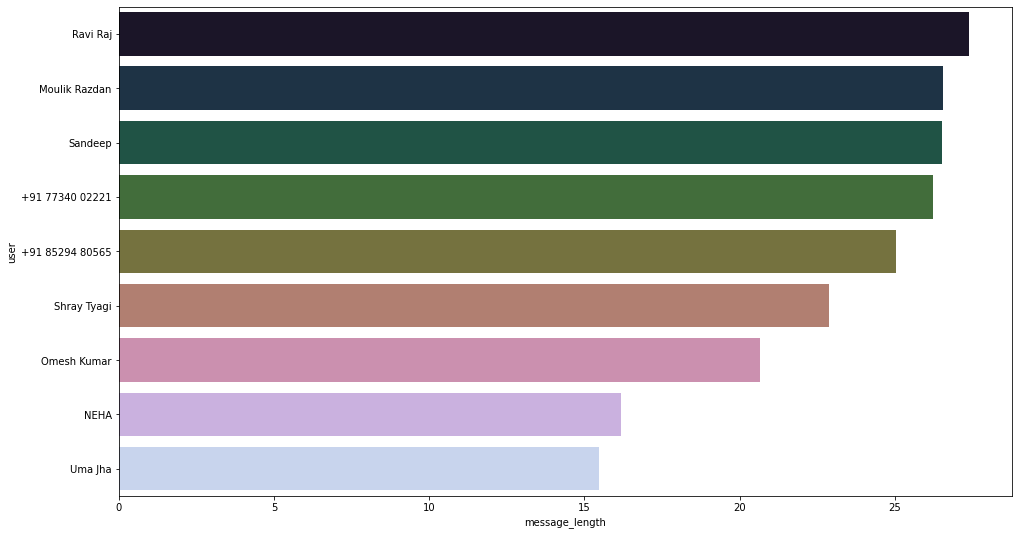

In [98]:
plt.figure(figsize=(16,9))
sns.barplot(y= "user", x = "message_length", data = msg_length_df, palette=sns.color_palette('cubehelix',10));

#Question 5 : Most used emojis in the group?
----

In [99]:
whatsapp_df5 = whatsapp_df.copy();

emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df5.iterrows():
        emojis_found = r.findall(row["message"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1


In [107]:
emojis_df =  pd.DataFrame()

emojis_df['emoji'] = [''] * 5
emojis_df['number_of_Emoji'] = [0] * 5

i = 0
for item in emoji_ctr.most_common(5):
    emojis_df.emoji[i] = item[0]
    emojis_df.number_of_Emoji[i] = int(item[1])
  
    i += 1

emojis_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,emoji,number_of_Emoji
0,es,781
1,en,759
2,it,559
3,pt,164
4,,0


#DATA VISUALIZATION

In [108]:
fig = px.pie(emojis_df, values='number_of_Emoji', names='emoji',title='Emoji percentage used in chat group')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#Question 6 : Words  which are most  commonly used 
----

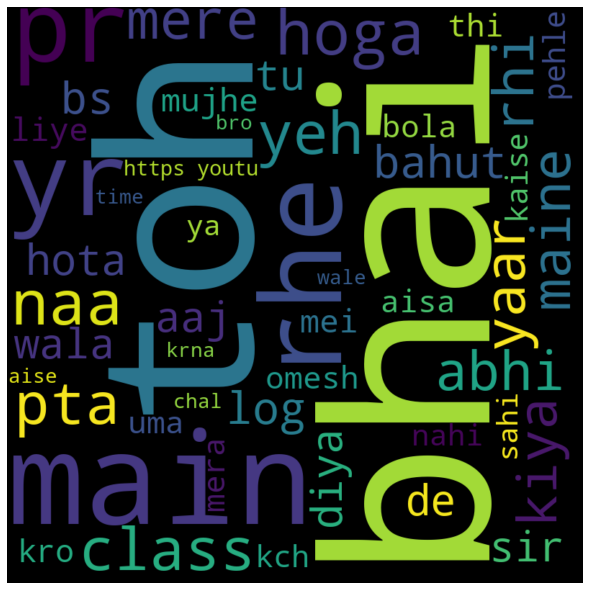

In [122]:
comment_words = ' '
stopwords = STOPWORDS.update(['ha', 'ka', 'mai', 'mil', 'kya', 'ho', 'tere', 'na', 'bol', 'ki', 'alli',
                              'message', 'deleted', 'ok', 'will','image','ommited', 'omitted', 'baat','tha',
                              'bhi','aur','haan','han','kuch','hogaya','ho','hua','hi','karo','raha','gya',
                              'bi','rha','tum','pata','hai','nhi','ko','koi','jo','ni','dekh','jo','fir',
                              'karo','aa','phir','ye','ek','le','wo','haa','per','se','sb','ab','hu','ke','kr'])
  
for val in whatsapp_df6.message.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',
                max_words = 50, 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation= 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()